In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

X

array([[-2.03901308,  0.32025824,  0.98301754, ...,  2.26610328,
         0.82591571,  0.29671579],
       [ 0.45138164, -1.77097802,  1.69292382, ..., -1.11701321,
         1.18554921,  0.8801374 ],
       [-1.0114408 ,  0.17448199, -0.50452384, ...,  0.34608828,
        -0.40534896,  0.11418628],
       ..., 
       [-0.35887017,  0.80823706,  1.00222126, ...,  1.41856265,
        -1.45306953, -0.7815603 ],
       [ 0.60432869,  0.26177733, -0.09512392, ...,  0.63071899,
         1.56717037,  0.7282623 ],
       [ 1.44840587,  1.656481  , -0.31669016, ..., -0.45273198,
         0.24458969, -0.16174568]])

In [45]:
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

In [46]:
y

array([  3.58140701e+00,   2.61297927e+00,   4.09383314e+00,
         7.10516915e+00,   2.53188320e+00,   7.77826335e+00,
         4.10031818e+00,   5.47683465e+00,   3.02631093e+00,
         5.66001234e+00,   2.24843204e+00,  -1.40879957e-01,
         8.22691883e+00,   7.64753028e+00,   7.63060456e+00,
         4.56567565e+00,   5.56078120e+00,   3.10101140e+00,
         3.90044410e+00,   3.64517418e+00,   4.59915939e+00,
         4.08324019e+00,   2.55250869e+00,   4.80198999e+00,
         6.38352517e+00,   4.89435058e+00,   2.91942107e+00,
         2.18723686e+00,   6.46648286e+00,   2.21828617e+00,
         2.29434433e+00,   2.04014648e+00,   7.88412356e-01,
         4.18885469e+00,   6.26895793e+00,   8.69741278e-01,
         6.04916655e+00,   4.94533601e+00,   5.69149324e+00,
         4.15951860e+00,   7.64877430e+00,   9.72004598e+00,
         2.62990317e+00,   1.81660116e+00,   1.09584438e+01,
         7.72311524e+00,   3.91081822e+00,   7.22934977e-01,
         8.62684866e+00,

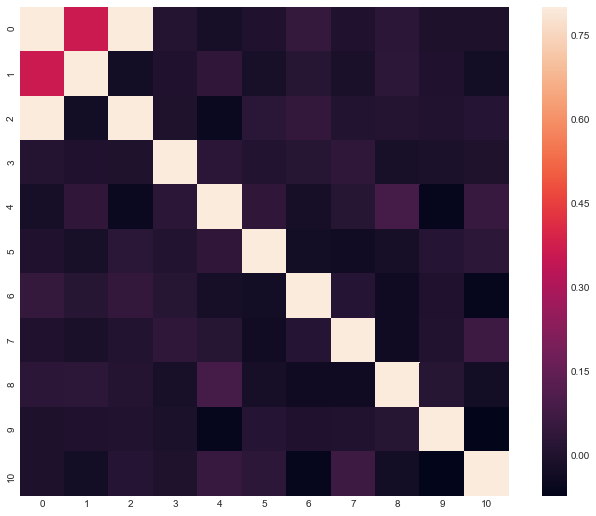

In [47]:
# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.835755757899
R-squared PLSR: 0.835755757899


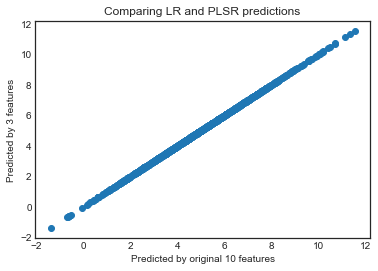

In [53]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=8)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Using y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

#### 3 features:
R-squared regression: 0.835755757899

R-squared PLSR: 0.835755279962
    
#### 2 features:
R-squared regression: 0.835755757899

R-squared PLSR: 0.835709699582
   
#### 4 features:
R-squared regression: 0.835755757899

R-squared PLSR: 0.835755757306

#### 5 features:
R-squared regression: 0.835755757899

R-squared PLSR: 0.835755757894

#### 8 features:
R-squared regression: 0.835755757899

R-squared PLSR: 0.835755757899

#### 1 feature:
R-squared regression: 0.835755757899

R-squared PLSR: 0.832126286336


Using y = X[:, 3] + 2 * X[:, 5] - 0.5 * X[:, 7] + np.random.normal(size=n * 1) + 4

#### 3 features:
R-squared regression: 0.830238812151

R-squared PLSR: 0.830238422093
    
#### 2 features:
R-squared regression: 0.830238812151

R-squared PLSR: 0.830205448778
   
#### 4 features:
R-squared regression: 0.830238812151

R-squared PLSR: 0.830238809953

#### 5 features:
R-squared regression: 0.830238812151

R-squared PLSR: 0.830238812137

#### 8 features:
R-squared regression: 0.830238812151

R-squared PLSR: 0.830238812151

#### 1 feature:
R-squared regression: 0.830238812151

R-squared PLSR: 0.825634438949
